In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
counts_nans = pd.DataFrame(data.isna().sum(), columns=['NaNs'])
percent_nans = pd.DataFrame(((data.isna().mean()) * 100), columns=['percent of total'])
percent_of_nans_data = pd.concat([counts_nans, percent_nans], axis=1)

In [5]:
percent_of_nans_data

,NaNs,percent of total
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [6]:
data.drop(columns='Cabin' ,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
ce_data = data.copy()   # containing embarked feature data

In [8]:
ce_data.drop(columns=['Embarked', 'PassengerId'], inplace=True)
ce_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [124]:
data['Embarked'].fillna('S', inplace=True)

In [135]:
data['Survived'][data['Age'].isnull()].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [146]:
data['Sex'][data['Age'].isnull()].value_counts(sort=False)

female     53
male      124
Name: Sex, dtype: int64

In [147]:
data[data['Survived'] == 1][data['Age'].isnull()].Sex.value_counts()

<ipython-input-147-cfe95167d6a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Survived'] == 1][data['Age'].isnull()].Sex.value_counts()


female    36
male      16
Name: Sex, dtype: int64

<ipython-input-149-f2ee7f9b3c47>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rect2 = plt.bar(sorted(list(set(data['Sex'].values))), data[data['Survived'] == 1][data['Age'].isnull()].Sex.value_counts(), align='edge')


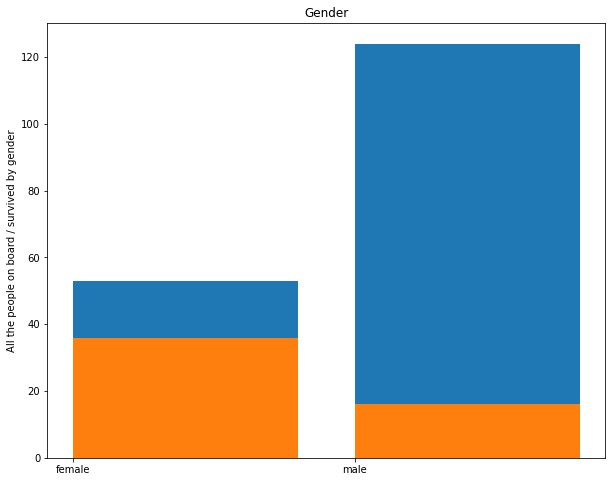

In [149]:
plt.figure(figsize=(10, 8))
rect1 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'][data['Age'].isnull()].value_counts(sort=False), align='edge')
rect2 = plt.bar(sorted(list(set(data['Sex'].values))), data[data['Survived'] == 1][data['Age'].isnull()].Sex.value_counts(), align='edge')
plt.ylabel('All the people on board / survived by gender')
plt.title('Gender')
plt.show()

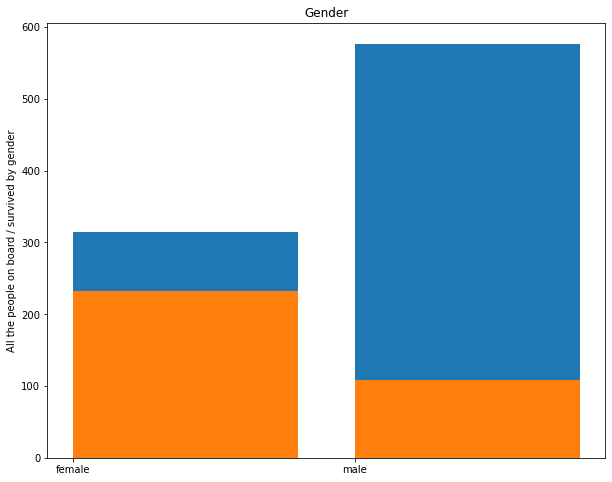

In [112]:
plt.figure(figsize=(10, 8))
rect1 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'].value_counts(sort=False), align='edge')
rect2 = plt.bar(sorted(list(set(data['Sex'].values))), data['Sex'][data['Survived'] == 1].value_counts(sort=False), align='edge')
plt.ylabel('All the people on board / survived by gender')
plt.title('Gender')
plt.show()